# Importing Dependencies

In [31]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Data Description

In [36]:
# read data 

data = pd.read_csv('premier_train_dataset.csv')
data.drop(data.columns[0],axis=1,inplace=True)

data[40:50]


#HTGS       - Home Team Goals Scored (so far in the league)
#ATGS       - Away Team Goals Scored (so far in the league)
#HTGC       - Home Team Goals Conceded (so far in the league)
#ATGC       - Away Team Goals Conceded (so far in the league)
#FTHG       - Full Time Home Goals (in the match)
#FTAG       - Full Time Away Goals (in the match)
#FTR        - Full Time Result (H- Home Win; D - Draw; A - Away Win)
#HomeTeamLP - Home Team League Position
#AwayTeamLP - Away Team League Position
#HTFormPts  - Home Team sum of points in the last 5 games
#ATFormPts  - Away Team sum of points in the last 5 games
#HTGD       - Home Team Goal Diference (so far in the league)
#ATGD       - Away Team Goal Diference (so far in the league)
#MW         - Match Week
#HTGS       - Home Team Points (so far in the league)
#ATGS       - Away Team Points (so far in the league)

,HTGS,ATGS,HTGC,ATGC,FTHG,FTAG,HomeTeamLP,AwayTeamLP,HTFormPts,ATFormPts,HTGD,ATGD,MW,HTP,ATP
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,24.300164,24.405757,24.387500,24.236349,1.522862,1.124671,10.362500,10.362500,6.248026,6.405592,0.275658,-0.134375,19.500000,25.835197,25.536842
std,16.932033,16.909822,16.292538,16.223189,1.294758,1.114405,5.557533,5.557533,3.554292,3.520761,14.331825,14.251167,10.966758,18.635793,18.556316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-69.000000,-65.000000,1.000000,0.000000,0.000000
25%,11.000000,11.000000,11.000000,11.000000,1.000000,0.000000,5.750000,5.750000,4.000000,4.000000,-7.000000,-8.000000,10.000000,11.000000,11.000000
50%,23.000000,23.000000,23.000000,23.000000,1.000000,1.000000,10.500000,10.500000,6.000000,6.000000,0.000000,-1.000000,19.500000,23.000000,23.000000
75%,35.000000,35.000000,36.000000,36.000000,2.000000,2.000000,15.250000,15.250000,9.000000,9.000000,6.000000,5.000000,29.000000,37.000000,37.000000
max,100.000000,96.000000,85.000000,82.000000,9.000000,6.000000,18.000000,18.000000,15.000000,15.000000,70.000000,62.000000,38.000000,130.000000,127.000000


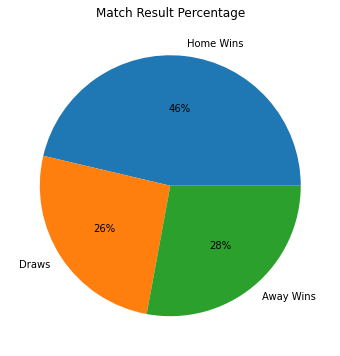

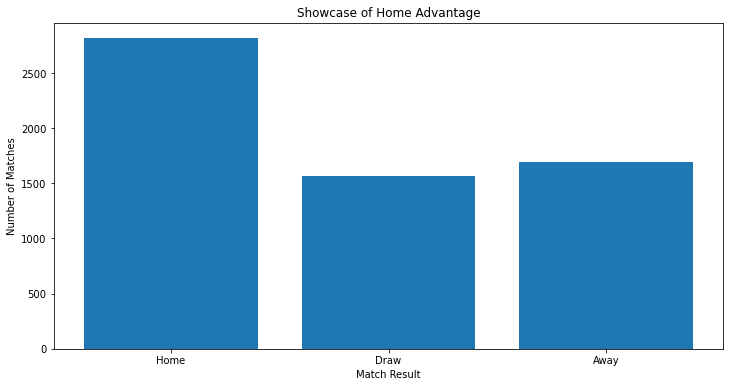

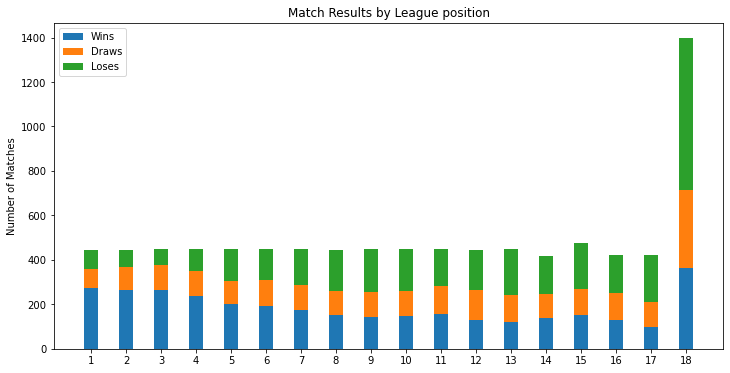

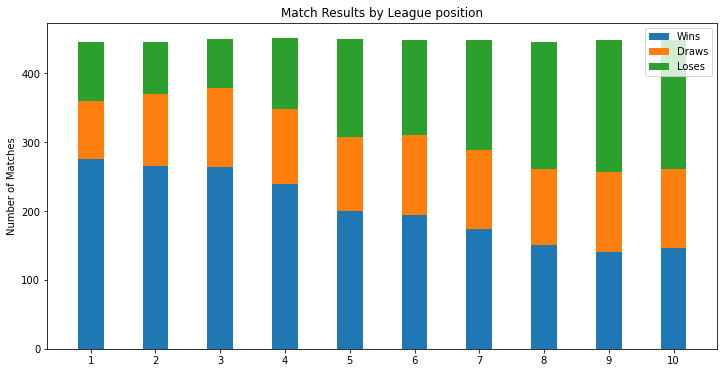

In [61]:

plt.rcParams["figure.figsize"] = (12, 6)
# Total number of matches.
n_matches = data.shape[0]

# Calculate H/D/A totals.
n_homewins = len(data[data.FTR == 'H'])
n_draws = len(data[data.FTR == 'D'])
n_awaywins = len(data[data.FTR == 'A'])

# Calculate H/D/A percentages.
home_win_rate = (float(n_homewins) / (n_matches)) * 100
draw_rate = (float(n_draws) / (n_matches)) * 100
away_win_rate = (float(n_awaywins) / (n_matches)) * 100

#Plot pie chart
pie_y = [n_homewins, n_draws, n_awaywins]
pie_labels = ["Home Wins", "Draws", "Away Wins"]
plt.pie(pie_y, labels = pie_labels, autopct='%1.0f%%')
plt.title("Match Result Percentage")
plt.show()

#Plot bar chart
bar_x = np.array(["Home", "Draw", "Away"])
bar_y = np.array([n_homewins, n_draws, n_awaywins])
plt.bar(bar_x,bar_y)
plt.xlabel("Match Result")
plt.ylabel("Number of Matches")
plt.title("Showcase of Home Advantage")
plt.show()

#Plot Bar Chart of League position W/D/L #######################################


#labels = np.flip(labels)
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

wins = np.zeros(18)
draws = np.zeros(18)
loses = np.zeros(18)


for index, row in data.iterrows():
    if row['MW']>10:
        if row['FTR']=='H':
            wins[int(row['HomeTeamLP'])-1]+=1
            loses[int(row['AwayTeamLP'])-1]+=1
        elif row['FTR']=='A':
            loses[int(row['HomeTeamLP'])-1]+=1
            wins[int(row['AwayTeamLP'])-1]+=1
        else:
            draws[int(row['HomeTeamLP'])-1]+=1
            draws[int(row['AwayTeamLP'])-1]+=1

fig, ax = plt.subplots()
width = 0.4

ax.bar(labels, wins, width, label='Wins')
ax.bar(labels, draws, width, bottom=wins,
       label='Draws')
ax.bar(labels, loses, width, bottom=wins+draws,
       label='Loses')

ax.set_ylabel('Number of Matches')
ax.set_title('Match Results by League position')
ax.legend()

plt.show()

# O dataset tem uma cena estranha, bué equipas na posição 18, mesmo que faça só apartir de MW 10

labels = labels[0:10]
wins = wins[0:10]
draws = draws[0:10]
loses = loses[0:10]

fig, ax = plt.subplots()
width = 0.4

ax.bar(labels, wins, width, label='Wins')
ax.bar(labels, draws, width, bottom=wins,
       label='Draws')
ax.bar(labels, loses, width, bottom=wins+draws,
       label='Loses')

ax.set_ylabel('Number of Matches')
ax.set_title('Match Results by League position')
ax.legend()

plt.show()